In [2]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import re

# Import LogoMaker
import sys
sys.path.append('../')
import logomaker

%matplotlib inline
plt.ion()

In [37]:
file_name = 'data/polly/IAIIIT_matrix_ddG.csv'
matrix = pd.read_csv(file_name, index_col=False).iloc[:,1:]
matrix.head()

,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,U,V,Y,X,Z
0,-0.466413,NaN,NaN,NaN,NaN,NaN,-0.603462,NaN,NaN,-0.216634,...,0.000000,NaN,-0.543360,NaN,-0.270482,NaN,NaN,-0.550548,NaN,NaN
1,-0.518936,NaN,NaN,-0.894634,-0.476292,-0.646081,-0.314229,0.000000,NaN,NaN,...,2.318028,-0.388696,-0.584893,NaN,NaN,NaN,NaN,-0.508623,NaN,NaN
2,0.000000,NaN,NaN,NaN,-0.812395,-0.378347,NaN,-0.689532,0.435996,NaN,...,0.729370,0.077148,NaN,-0.358175,NaN,NaN,-0.707129,-0.808144,NaN,NaN
3,-0.524161,NaN,NaN,NaN,-0.642867,-0.646081,NaN,0.000000,NaN,-0.825334,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.620843,-0.990144,NaN,NaN
4,-0.669081,NaN,NaN,-0.627053,-0.550998,NaN,-0.338667,0.000000,NaN,-0.498486,...,NaN,-0.608616,NaN,NaN,NaN,NaN,NaN,-0.495978,NaN,NaN


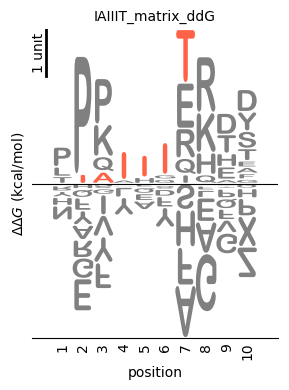

In [38]:
logo = logomaker.make_logo(matrix=matrix,
                    highlight_sequence='.IAIIIT...',
                    highlight_colors='tomato',
                    character_colors='gray',
                    figsize=[3,4],
                    xlim=[-0.5,11.5],
                    xticks=range(1,len(matrix)+1),
                    axes_type='scalebar',
                    scalebar_x=.2,
                    ylabel='$\Delta \Delta G$ (kcal/mol)',
                    shift_first_position_to=1,
                    vsep=.005,
                    title='IAIIIT_matrix_ddG',
                    center_columns=True,
                    draw_now=False)

fig, ax = plt.subplots(figsize=[3,4])
logo.draw(ax)

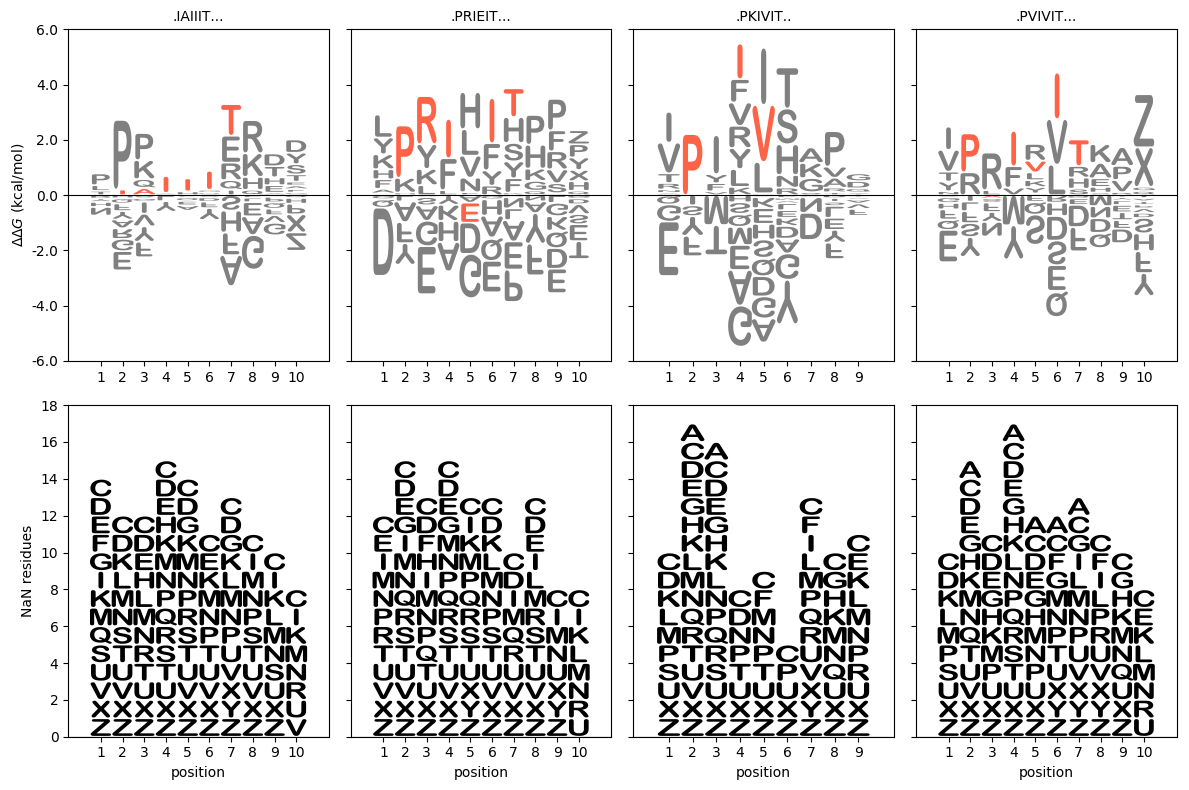

In [54]:
pairs = [
    ('IAIIIT_matrix_ddG.csv','.IAIIIT...'),
    ('PRIEIT_matrix_ddG.csv','.PRIEIT...'),
    ('PKIVIT_matrix_ddG.csv','.PKIVIT..'),
    ('PVIVIT_matrix_ddG.csv','.PVIVIT...'),]

fig, axs = plt.subplots(2,4,figsize=[12,8])

for n, pair in enumerate(pairs):
    
    name = pair[0]
    wt_seq = pair[1]
    if n ==0:
        mat_kwargs={'ylabel':'$\Delta \Delta G$ (kcal/mol)'}
        nan_kwargs={'ylabel':'NaN residues', 'ytick_format':'%d'}
    else:
        mat_kwargs={'ylabel':'', 'yticklabels':[]}
        nan_kwargs={'ylabel':'', 'yticklabels':[]}
    
    matrix = pd.read_csv('data/polly/%s'%name,index_col=False).iloc[:,1:]    
    logo = logomaker.make_logo(
                        matrix=matrix,
                        axes_type='everything',
                        shift_first_position_to=1,
                        vsep=.005,
                        title=wt_seq,
                        ylim=[-6,6],
                        character_colors='gray',
                        highlight_sequence=wt_seq,
                        highlight_colors='tomato',
                        draw_now=False,
                        center_columns=True,
                        xlabel='',
                        xlim=[-0.5,len(matrix)+1.5],
                        **mat_kwargs)
    logo.draw(axs[0,n])
    
    nan_matrix = np.isnan(matrix).astype(int)
    nan_logo = logomaker.make_logo(
                        matrix=nan_matrix,
                        matrix_type='counts',
                        logo_type='counts', 
                        character_colors='black',
                        draw_now=False,
                        vsep=.005,
                        stack_order='fixed_going_down',
                        axes_type='everything',
                        ylim=[0,18],
                        xlim=[-0.5,len(matrix)+1.5],
                        xticks=range(1,len(matrix)+1),
                        shift_first_position_to=1,
                        **nan_kwargs)
    nan_logo.draw(axs[1,n])
    
# Save plot
fig.savefig('output/for_polly_ddG.pdf')

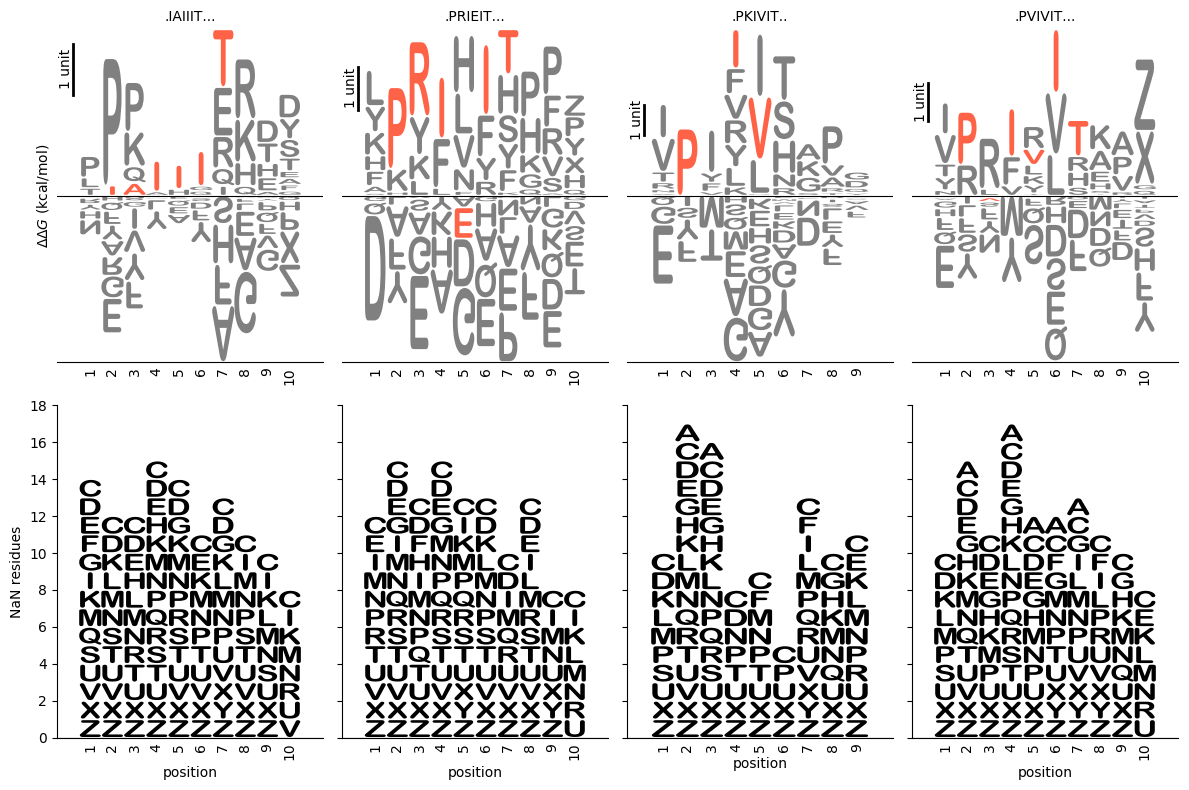

In [52]:
pairs = [
    ('IAIIIT_matrix_ddG.csv','.IAIIIT...'),
    ('PRIEIT_matrix_ddG.csv','.PRIEIT...'),
    ('PKIVIT_matrix_ddG.csv','.PKIVIT..'),
    ('PVIVIT_matrix_ddG.csv','.PVIVIT...'),]

fig, axs = plt.subplots(2,4,figsize=[12,8])

for n, pair in enumerate(pairs):
    
    name = pair[0]
    wt_seq = pair[1]
    if n ==0:
        mat_kwargs={'ylabel':'$\Delta \Delta G$ (kcal/mol)'}
        nan_kwargs={'ylabel':'NaN residues', 'ytick_format':'%d'}
    else:
        mat_kwargs={'ylabel':'', 'yticklabels':[]}
        nan_kwargs={'ylabel':'', 'yticklabels':[]}
    
    matrix = pd.read_csv('data/polly/%s'%name,index_col=False).iloc[:,1:]    
    logo = logomaker.make_logo( matrix=matrix,
                                highlight_sequence=wt_seq,
                                highlight_colors='tomato',
                                character_colors='gray',
                                xlim=[-0.5,len(matrix)+1.5],
                                xticks=range(1,len(matrix)+1),
                                xlabel='',
                                scalebar_text='1 unit',
                                axes_type='scalebar',
                                scalebar_x=.2,
                                scalebar_ymin=2,
                                shift_first_position_to=1,
                                vsep=.005,
                                title=wt_seq,
                                center_columns=True,
                                draw_now=False,
                                **mat_kwargs)
    logo.draw(axs[0,n])
    
    nan_matrix = np.isnan(matrix).astype(int)
    nan_logo = logomaker.make_logo(
                        matrix=nan_matrix,
                        matrix_type='counts',
                        logo_type='counts', 
                        character_colors='black',
                        draw_now=False,
                        vsep=.005,
                        stack_order='fixed_going_down',
                        axes_type='classic',
                        ylim=[0,18],
                        xlim=[-0.5,len(matrix)+1.5],
                        xticks=range(1,len(matrix)+1),
                        shift_first_position_to=1,
                        **nan_kwargs)
    nan_logo.draw(axs[1,n])
    
# Save plot
fig.savefig('output/for_polly_ddG_alt.pdf')